In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

### Load Data

In [2]:
trainCsv = "../data/cleanLoanDataTrain.csv"
valCsv = "../data/cleanLoanDataValidation.csv"

In [3]:
trainDf = pd.read_csv(trainCsv)
trainDf = trainDf.drop(columns=["ApplicantIncome","CoapplicantIncome"])
trainDf.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,1,1,1,0,128000.0,360.0,1,0,0,6091.0
1,0,1,0,1,1,66000.0,360.0,1,2,1,3000.0
2,0,1,0,0,0,120000.0,360.0,1,2,1,4941.0
3,0,0,0,1,0,141000.0,360.0,1,2,1,6000.0
4,0,1,2,1,1,267000.0,360.0,1,2,1,9613.0


In [4]:
valDf = pd.read_csv(valCsv)
valDf = valDf.drop(columns=["ApplicantIncome","CoapplicantIncome"])
valDf.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,0,1,0,1,0,110000.0,360.0,1,2,5720.0
1,0,1,1,1,0,126000.0,360.0,1,2,4576.0
2,0,1,2,1,0,208000.0,360.0,1,2,6800.0
3,0,1,2,1,0,100000.0,360.0,0,2,4886.0
4,0,0,0,0,0,78000.0,360.0,1,2,3276.0


### Logistic Regression

In [5]:
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
y = trainDf["Loan_Status"]
X = trainDf.drop(columns="Loan_Status")

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [8]:
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
print(f"Training Data Score: {classifier.score(x_train, y_train)}")
print(f"Testing Data Score: {classifier.score(x_test, y_test)}")

Training Data Score: 0.7061611374407583
Testing Data Score: 0.6737588652482269


### Logistic Regression - after log-transform
* After inspect the histogram, income and loan amount distributions are skewed
* Perform log-transformation to reduce outlier effects
* Model increases in accuracy

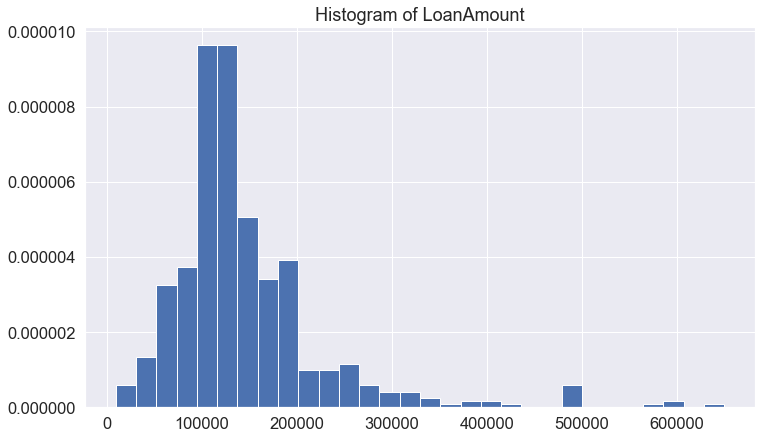

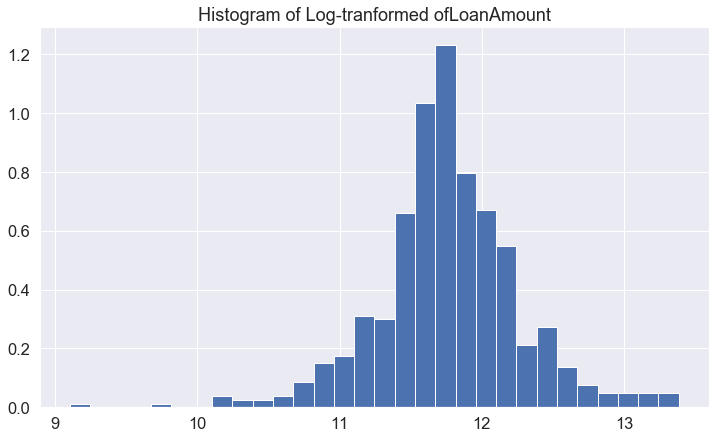

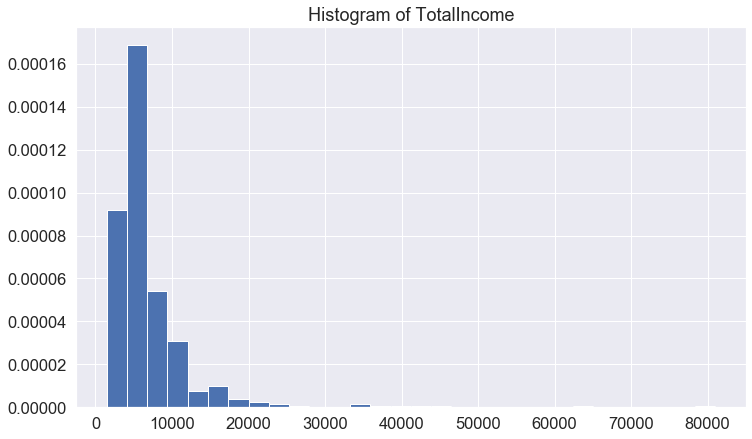

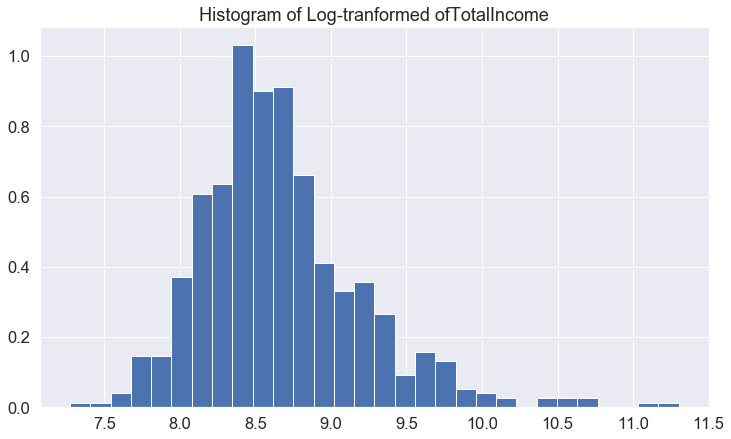

In [10]:
colList = ["LoanAmount","TotalIncome"]

for col in colList: 
    fig1 = plt.figure(figsize=(12,7))
    sns.set(font_scale=1.5)
    plt.hist(trainDf[col], density=True, bins=30)
    plt.title('Histogram of ' + col)
    
    fig2 = plt.figure(figsize=(12,7))
    sns.set(font_scale=1.5)
    plt.hist(np.log(trainDf[col]), density=True, bins=30)
    plt.title('Histogram of Log-tranformed of' + col)   


In [11]:
trainDf["Log_TotalIncome"]= np.log(trainDf["TotalIncome"])
trainDf["Log_LoanAmount"]= np.log(trainDf["LoanAmount"])

In [12]:
y = trainDf["Loan_Status"]
X = trainDf.drop(columns=["Loan_Status","LoanAmount","TotalIncome"])

In [13]:
classifierLog = LogisticRegression()
classifierLog

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
classifierLog.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
print(f"Training Data Score: {classifierLog.score(x_train, y_train)}")
print(f"Testing Data Score: {classifierLog.score(x_test, y_test)}")

Training Data Score: 0.7748815165876777
Testing Data Score: 0.75177304964539


### Logistic Regression - added features
* Uses log(total income) and log(loan amount
* Add monthly payment = loan amount/loan term
* Add remaining income = total income - monthly payment

In [16]:
trainDf["MonthlyPayment"] = trainDf["LoanAmount"]/trainDf["Loan_Amount_Term"]
trainDf["RemainingIncome"] = trainDf["TotalIncome"] - trainDf["MonthlyPayment"]
trainDf.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Log_TotalIncome,Log_LoanAmount,MonthlyPayment,RemainingIncome
0,0,1,1,1,0,128000.0,360.0,1,0,0,6091.0,8.714568,11.759786,355.555556,5735.444444
1,0,1,0,1,1,66000.0,360.0,1,2,1,3000.0,8.006368,11.097410,183.333333,2816.666667
2,0,1,0,0,0,120000.0,360.0,1,2,1,4941.0,8.505323,11.695247,333.333333,4607.666667
3,0,0,0,1,0,141000.0,360.0,1,2,1,6000.0,8.699515,11.856515,391.666667,5608.333333
4,0,1,2,1,1,267000.0,360.0,1,2,1,9613.0,9.170872,12.495004,741.666667,8871.333333


In [17]:
y = trainDf["Loan_Status"]
X = trainDf.drop(columns=["Loan_Status","LoanAmount","TotalIncome"])

In [18]:
classifierAddedFea = LogisticRegression()
classifierAddedFea

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
classifierAddedFea.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
print(f"Training Data Score: {classifierAddedFea.score(x_train, y_train)}")
print(f"Testing Data Score: {classifierAddedFea.score(x_test, y_test)}")

Training Data Score: 0.7843601895734598
Testing Data Score: 0.7092198581560284


### Save the model 
* use pickle
* use joblib

In [21]:
valDf["Log_TotalIncome"]= np.log(valDf["TotalIncome"])
valDf["Log_LoanAmount"]= np.log(valDf["LoanAmount"])
valDf = valDf.drop(columns=["LoanAmount","TotalIncome"])

In [22]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(classifierLog) 
  
# Load the pickled model 
classifier_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions for validation
classifier_from_pickle.predict(valDf) 

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [23]:
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(classifierLog, 'logisticRegression.pkl') 
  
# Load the model from the file 
classifier_from_joblib = joblib.load('logisticRegression.pkl')  
  
# Use the loaded model to make predictions 
classifier_from_joblib.predict(valDf) 

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

### Apply  a model on dummy data
* Choose a model that has a balance of accuracy and complexity
  - more complex models are more likely to have better accuracy, but requires more work and run time
  - simplier models are more likely to have less accuracy to the more complex models, but require much less processing and/or run time

In [24]:
#  create dummy data to tets
colNames = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',\
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',\
       'TotalIncome']
colValues = [[1],[1],[1],[0],[0],[400000],[360],[1],[1],[60000]]
testDummyDf = pd.DataFrame(data=colValues,index=colNames).T

testDummyDf["Log_TotalIncome"]= np.log(testDummyDf["TotalIncome"])
testDummyDf["Log_LoanAmount"]= np.log(testDummyDf["LoanAmount"])
testDummyDf = testDummyDf.drop(columns=["LoanAmount","TotalIncome"])

testDummyDf

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Log_TotalIncome,Log_LoanAmount
0,1,1,1,0,0,360,1,1,11.0021,12.89922


In [25]:
# Use the loaded model to make predictions 
classifier_from_joblib.predict(testDummyDf) 

array([1], dtype=int64)